This notebook is divided in following sections:

- Install packages if missing
- **Load data**
  - Load data from single source
  - Load data from multiple sources
  - Merge multi-source data into single datasource
- Handle **Missing values**
- **Manipulate Data**
- Plotting / **Visualization**
  - Univariate Analysis
  - Bivariate Analysis
- Preparation of **Training & Test Dataset**


# Install packages if missing

Uncomment following code to install required packages

In [1]:
# ! pip install pandas  
# ! pip install numpy 
# ! pip install matplotlib 
# ! pip install seaborn 
# ! pip install sklearn

# Load data

We use pandas to load csv data as **dataframe**

[Boston dataset detail](http://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html)

In [2]:
import pandas as pd
import numpy as np

### Load data from single source

In [3]:
df_boston = pd.read_csv("boston.csv")
df_boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001


In [4]:
print("df_boston's type =", type(df_boston))
print("df_boston.shape =", df_boston.shape)

df_boston's type = <class 'pandas.core.frame.DataFrame'>
df_boston.shape = (506, 14)


### Load data from multiple sources

We have two data files which we load and merge into a single dataframe

In [5]:
df1 = pd.read_csv("rating_final.tsv", sep='\t')
df2 = pd.read_csv("parking.csv")

print("df1.shape =", df1.shape)
print("df2.shape =", df2.shape)

df1.shape = (1161, 6)
df2.shape = (702, 2)


In [6]:
df1.head()

,Unnamed: 0,userID,placeID,rating,food_rating,service_rating
0,0,U1077,135085,2,2,2
1,1,U1077,135038,2,2,1
2,2,U1077,132825,2,2,2
3,3,U1077,135060,1,2,2
4,4,U1068,135104,1,1,2


In [7]:
df2.head()

,placeID,parking_lot
0,135111,public
1,135110,none
2,135109,none
3,135108,none
4,135107,none


### Merge Data into single datasource

More information can be found in [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/merging.html) 

In [9]:
df_merge = pd.merge(left=df1, right=df2, on="placeID", how="left")

print("df_merge.shape =", df_merge.shape)

df_merge.head()

df_merge.shape = (1161, 7)


,Unnamed: 0,userID,placeID,rating,food_rating,service_rating,parking_lot
0,0,U1077,135085,2,2,2,public
1,1,U1077,135038,2,2,1,none
2,2,U1077,132825,2,2,2,none
3,3,U1077,135060,1,2,2,none
4,4,U1068,135104,1,1,2,yes


# Handle Missing values in boston dataset

In [10]:
print("df_boston.shape =", df_boston.shape)

df_boston.head()

df_boston.shape = (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


#### Check if any missing values in dataframe

In [11]:
df_boston.isnull().values.any()

False

#### Drop row if they contain null values

In [12]:
df_boston = df_boston.dropna(axis=0, how='any')   # 0 = rows and 1 = columns

print("df_boston.shape =", df_boston.shape)

df_boston.shape = (506, 14)


#### Statistic summary of dataframe 

In [13]:
df_boston.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


# Manipulate boston dataset

In [14]:
print("df_boston shape's =", df_boston.shape)

df_boston.head(2)

df_boston shape's = (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.6


### Select only few features/columns from dataframe

In [15]:
our_feature = ['CRIM', 'ZN', 'INDUS']

df_filtered = df_boston[our_feature]

print("df_filtered shape's =", df_filtered.shape)

df_filtered.head(2)

df_filtered shape's = (506, 3)


,CRIM,ZN,INDUS
0,0.00632,18.0,2.31
1,0.02731,0.0,7.07


### Remove few features/columns from dataframe

In [16]:
drop_features = ['B', 'LSTAT', 'ZN']

df_removed = df_boston.drop(drop_features, axis=1)  ##  1 = column / 0 = row

print("df_removed shape's =", df_removed.shape)

df_removed.head(2)

df_removed shape's = (506, 11)


,CRIM,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,MEDV
0,0.00632,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,24.0
1,0.02731,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,21.6


### Select row[s] from data frame

In [17]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


**Select specific row by index**

In [18]:
df_boston.iloc[1]

CRIM         0.027310
ZN           0.000000
INDUS        7.070000
CHAS         0.000000
NOX          0.469000
RM           6.421000
AGE         78.900002
DIS          4.967100
RAD          2.000000
TAX        242.000000
PTRATIO     17.799999
B          396.899994
LSTAT        9.140000
MEDV        21.600000
Name: 1, dtype: float64

**Select multiple rows by index**

In [19]:
df_boston.iloc[1:4]  # start index : end index - 1

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002


**Select single column by row index**

In [20]:
df_boston.iloc[1:4]["NOX"]

1    0.469
2    0.469
3    0.458
Name: NOX, dtype: float64

**Select multiple column by row index**

In [21]:
columns = ["RM", "AGE"]

df_boston.iloc[1:4][columns]

,RM,AGE
1,6.421,78.900002
2,7.185,61.099998
3,6.998,45.799999


# Plotting / Visualization

In [22]:
import matplotlib.pyplot as plt 
%matplotlib inline

## Univariate Analysis

#### Using Histogram plot with Binning

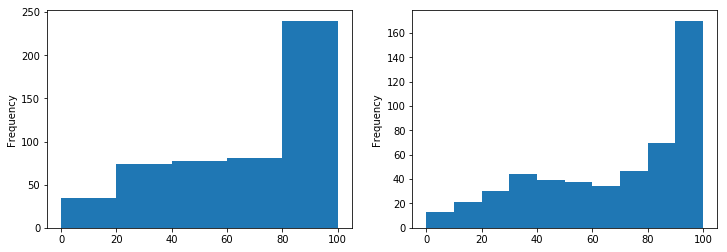

In [23]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

df_boston["AGE"].plot.hist(ax=ax1, bins=5, range=(0,100))
df_boston["AGE"].plot.hist(ax=ax2, bins=10, range=(0,100))

plt.show()

#### Using Box plot

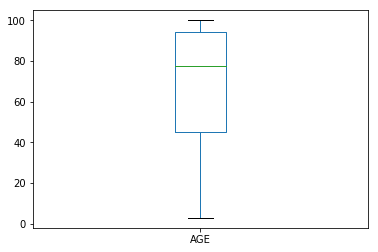

In [24]:
df_boston["AGE"].plot.box()

plt.show()

## Bivariate Analysis

Using Scatter plot

In [ ]:
print(str(df_boston['RM'].iloc[0]) + ",", df_boston['MEDV'].iloc[0])

In [ ]:
df_boston.plot.scatter(x='RM', y='MEDV');

# set x & y labels in plot
plt.xlabel("RM")
plt.ylabel("MEDV")

plt.show()

## Correlation plot

Using seaborn package

In [ ]:
import seaborn as sns

corr = df_boston.corr()

plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True, fmt=".1g")
plt.show()

# Preparation of Training & Test Dataset

In [ ]:
from sklearn.model_selection import train_test_split

Store features in X variable and target ( or label ) in y variable

In [ ]:
features = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']
target = ['MEDV']

X = df_boston[features]
y = df_boston[target]

print('df_boston shape =', df_boston.shape)
print('X shape =', X.shape)
print('y shape =', y.shape)

**Split boston dataset into train (80%) and test set (20%)**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('X_train shape =', X_train.shape)
print('y_train shape =', y_train.shape)
print('X_test shape =', X_test.shape)
print('y_test shape =', y_test.shape)